In [1]:
pip install optbinning
from optbinning import BinningProcess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 26.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Загрузка данных
data = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/Aggregation.txt', sep = '\t')


In [3]:
data.head()

x1     x2  class
0  15.55  28.65      2
1  14.90  27.55      2
2  14.45  28.35      2
3  14.15  28.80      2
4  13.75  28.05      2

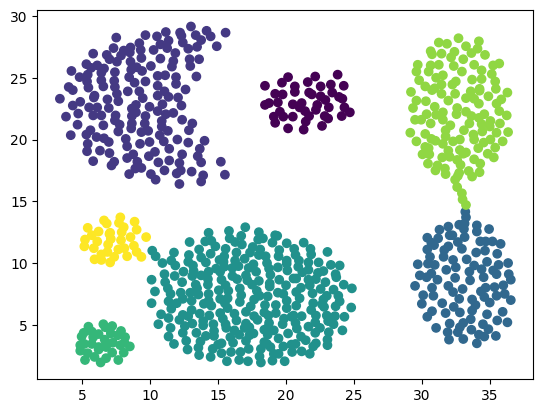

In [4]:
plt.scatter(x = data['x1'], y = data['x2'], c = data['class'])

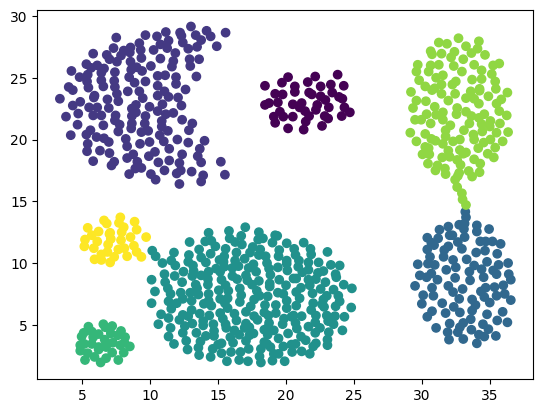

In [5]:
plt.scatter(x = data['x1'], y = data['x2'], c = data['class'])

In [6]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [7]:
print(kmeans.cluster_centers_)

[[32.69689922 22.08372093  6.        ]
 [ 7.17432432  7.725       5.83783784]
 [20.76811024  6.75748031  4.        ]
 [ 9.29464286 22.95267857  2.        ]
 [33.14417476  8.73203883  3.02912621]
 [21.28723404 22.99893617  1.04255319]
 [14.68892857  7.51642857  4.        ]]


In [8]:
print(kmeans.labels_)

[5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 2 6 2 6 6 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 6 6 2 2 2 6 6 6 6 6 6 6 6 6 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 6 6 6 2 6 6 6 6 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

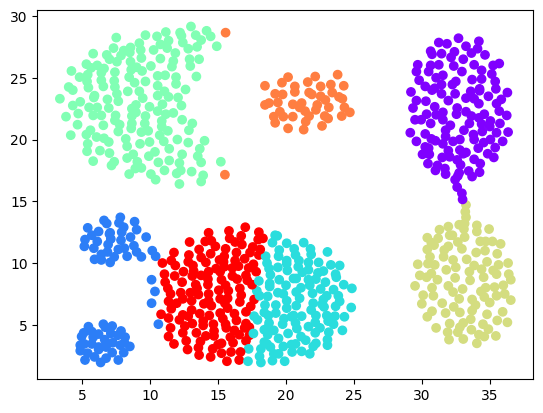

In [9]:
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

In [10]:
silhouette_score(data, kmeans.fit_predict(data))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.49316435093140837

In [11]:
banks = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/Банки РФ.csv', sep = ';', encoding = 'cp1251')

In [12]:
banks.head()

№              Банк  Город   Активы    Собственный капитал   \
0  1        «Авангард»      1    122109                  20440   
1  2           «Аверс»      2    110741                  24410   
2  3           «Агора»      1      1114                    356   
3  4  «Агропромкредит»      3     18774                   2332   
4  5         «Агророс»      4      7917                   1157   

    Средства физлиц    Кредиты НБС0нетто    Кредиты физлицам   
0              35443                32728                3319  
1              34918                13613                4924  
2                274                  351                 206  
3              12047                 6484                 903  
4               3564                 1909                 492

In [13]:
banks = banks.drop('Банк', axis= 1)

In [14]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   №                      356 non-null    int64
 1   Город                  356 non-null    int64
 2    Активы                356 non-null    int64
 3    Собственный капитал   356 non-null    int64
 4    Средства физлиц       356 non-null    int64
 5    Кредиты НБС0нетто     356 non-null    int64
 6    Кредиты физлицам      356 non-null    int64
dtypes: int64(7)
memory usage: 19.6 KB


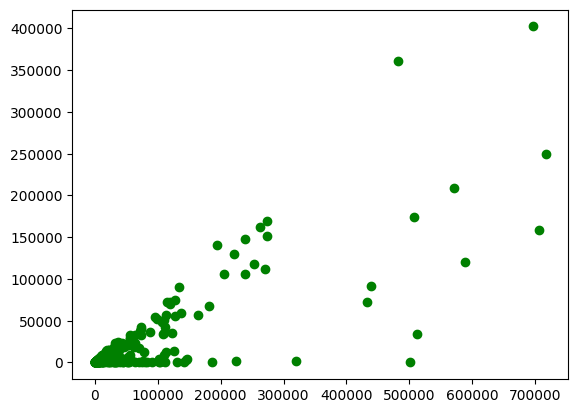

In [15]:
plt.scatter(banks.iloc[:,2],banks.iloc[:,4], label='True Position', c = 'green')

In [16]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(banks)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [17]:
print(kmeans.cluster_centers_)

[[1.83121429e+02 1.98142857e+01 1.04739929e+04 2.29566429e+03
  3.32125357e+03 3.70664286e+03 1.35327857e+03]
 [1.57000000e+02 1.00000000e+00 4.23400250e+05 9.44292500e+04
  4.12915000e+04 1.51773000e+05 3.90085000e+04]
 [2.98000000e+02 1.00000000e+00 5.89111500e+05 1.11807500e+05
  3.81746000e+05 3.64060000e+05 4.12789500e+05]
 [1.99352941e+02 1.13725490e+01 1.01313059e+05 1.59871176e+04
  2.72245686e+04 4.39977255e+04 1.65849608e+04]
 [1.84615385e+02 1.00000000e+01 2.20005308e+05 3.25065385e+04
  1.10852846e+05 1.21015385e+05 9.80856154e+04]
 [1.78333333e+02 2.00000000e+00 6.00074000e+05 6.61575000e+04
  1.57528000e+05 2.73836000e+05 7.40713333e+04]]


In [18]:
print(kmeans.labels_)

[3 3 0 0 0 5 0 0 0 0 0 0 0 3 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 3
 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 4 0 0 4 5 0 0 0 0 0 0 3 3 0 0 0 3 0 5 0 0 3 0 0 0 0 3 3 0 0
 0 4 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 3 0 1 3 0 0 0 0
 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 3 0
 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 3 4 0 0 0 0 1 0
 0 3 0 4 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 2 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 4 0 3 0 3 0 3 0 0 0 0 0 4 0 0 0 0 3 0 0 0 0 0 4 0 0 0
 0 5 3 0 0 5 0 0 0 0 0 0 0 0 3 3 3 0 0 0 0 0 2 3 0 0 0 3 0 4 0 0 0 0 0 0 0
 3 0 0 0 4 0 0 0 3 3 3 0 0 3 3 0 0 0 0 0 0 0 0]


In [19]:
plt.scatter(banks.iloc[:,2],banks.iloc[:,4], c=kmeans.labels_, cmap='rainbow')

In [20]:
silhouette_score(banks, kmeans.fit_predict(banks))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7352096044859429

In [21]:
a1 = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/a1.txt', sep = '\ ')

<ipython-input-21-3f13ca47e832>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  a1 = pd.read_csv('/content/drive/MyDrive/a1.txt', sep = '\ ')


In [22]:
a1.head()

x1  Unnamed: 1  Unnamed: 2     x2
0  54620         NaN         NaN  43523
1  52694         NaN         NaN  42750
2  53253         NaN         NaN  43024
3  54925         NaN         NaN  42624
4  54973         NaN         NaN  43980

In [23]:
a1 = a1.drop('Unnamed: 1', axis = 1)

In [24]:
a1 = a1.drop('Unnamed: 2', axis = 1)

In [25]:
a1.head()

x1     x2
0  54620  43523
1  52694  42750
2  53253  43024
3  54925  42624
4  54973  43980

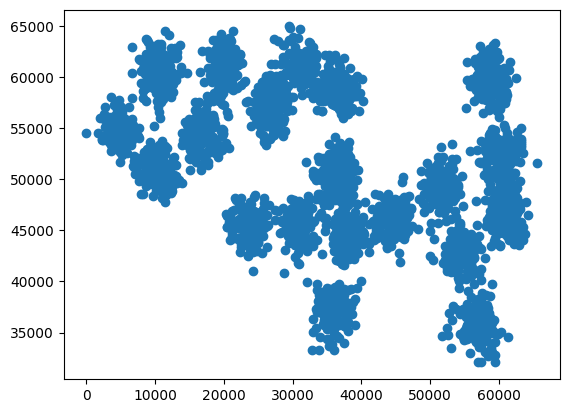

In [26]:
plt.scatter(a1.iloc[:,0],a1.iloc[:,1], label='True Position')

In [27]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(a1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20)

In [28]:
print(kmeans.cluster_centers_)

[[36419.55033557 58760.54362416]
 [ 4770.2972973  54722.59459459]
 [60959.31543624 46441.02684564]
 [35903.59731544 37050.80536913]
 [26778.10759494 56958.02531646]
 [51573.67320261 49327.29411765]
 [19903.18       61170.26666667]
 [56813.5704698  35697.3557047 ]
 [58641.16       59852.84      ]
 [30868.57432432 45602.14189189]
 [38001.03355705 44522.12080537]
 [10595.53333333 60619.72      ]
 [23495.15540541 45438.83783784]
 [44743.97385621 46293.7124183 ]
 [36164.8627451  50580.09803922]
 [30761.24475524 60996.1958042 ]
 [17043.57333333 54549.93333333]
 [10325.34210526 50846.02631579]
 [60331.40397351 52416.39735099]
 [54461.22972973 42821.51351351]]


In [29]:
print(kmeans.labels_)

[19 19 19 ... 11 11 11]


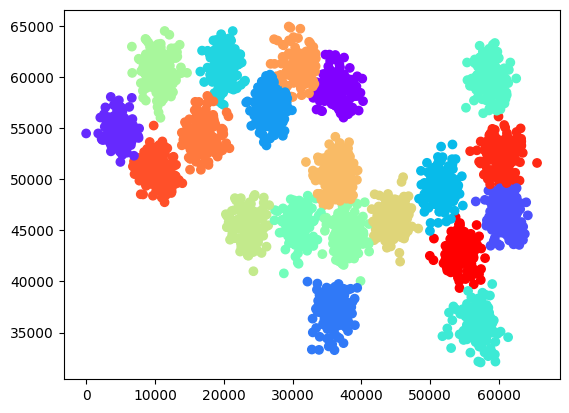

In [30]:
plt.scatter(a1.iloc[:,0],a1.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

In [31]:
silhouette_score(a1, kmeans.fit_predict(a1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.595083074010189

In [32]:
compound = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/Compound.txt', sep = '\t')

In [33]:
compound.head()

x1     x2  class
0  26.75  22.15      1
1  29.80  22.15      1
2  31.55  21.10      1
3  27.70  20.85      1
4  29.90  19.95      1

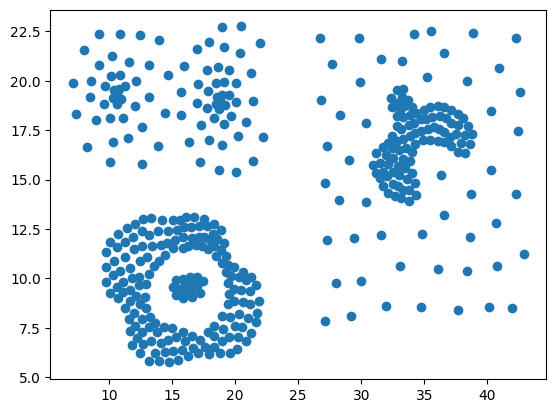

In [34]:
plt.scatter(compound.iloc[:,0],compound.iloc[:,1], label='True Position')

In [35]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(compound)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [36]:
print(kmeans.cluster_centers_)

[[10.81025641 19.32820513  3.02564103]
 [32.22045455 16.26420455  1.71590909]
 [18.54111111  9.45611111  5.08888889]
 [18.86477273 19.08295455  4.        ]
 [12.85588235  9.62764706  5.04705882]
 [38.0245283  16.60754717  1.54716981]]


In [37]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 1 1 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 2 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4]


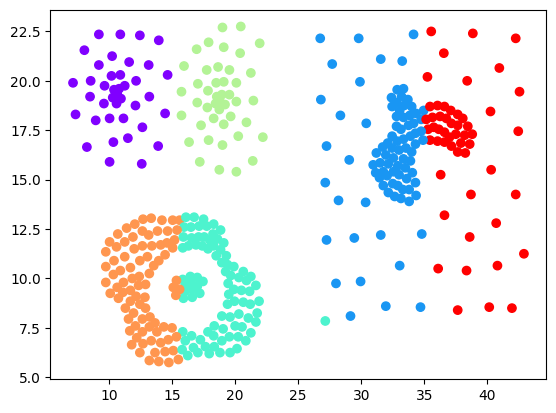

In [38]:
plt.scatter(compound.iloc[:,0], compound.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

In [39]:
silhouette_score(compound, kmeans.fit_predict(compound))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.43177907657182574

In [40]:
d31 = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/D31.txt', sep = '\t')

In [41]:
d31.head()

x1      x2  class
0  25.0514  5.7475      1
1  26.6614  7.3414      1
2  25.2653  6.2466      1
3  25.2285  4.7447      1
4  25.7529  5.1564      1

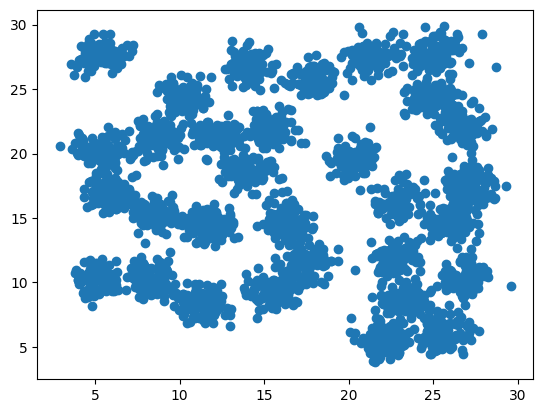

In [42]:
plt.scatter(d31.iloc[:,0], d31.iloc[:,1], label='True Position')

In [43]:
kmeans = KMeans(n_clusters=31)
kmeans.fit(d31)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=31)

In [44]:
print(kmeans.cluster_centers_)

[[26.872264   10.297452    6.        ]
 [ 8.696698   21.228501   21.        ]
 [26.069679   14.764719   12.        ]
 [27.273476   17.501443   18.        ]
 [ 5.352406   20.201413    5.        ]
 [21.329816   27.438064    7.        ]
 [15.61933     9.317882   13.        ]
 [22.719062   11.841419   27.        ]
 [ 5.847113   16.905674   31.        ]
 [26.773019   22.01356    24.        ]
 [12.105183   21.434374   10.        ]
 [15.405545   21.954818   29.        ]
 [ 8.378654   10.298188    3.        ]
 [17.544338   11.604312    2.        ]
 [11.394391    8.290449   19.        ]
 [22.109861    5.591008   25.        ]
 [ 8.63955253 15.23474444 16.        ]
 [20.325291   19.631174   15.        ]
 [14.091141   26.716324   22.        ]
 [25.228638   27.810043   23.        ]
 [ 5.407537   27.575742   20.        ]
 [25.542312    6.020901    1.        ]
 [23.238195    8.518126   11.        ]
 [ 5.099659   10.185879   30.        ]
 [10.230821   24.352315   28.        ]
 [24.825218   24.361423  

In [45]:
print(kmeans.labels_)

[21 21 21 ...  8  8  8]


In [46]:
plt.scatter(d31.iloc[:,0], d31.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

In [47]:
silhouette_score(d31, kmeans.fit_predict(d31))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7613827809962318

In [48]:
flame = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/flame.txt', sep = '\t')

In [49]:
flame.head()

x1     x2  class
0  1.85  27.80      1
1  1.35  26.65      1
2  1.40  23.25      2
3  0.85  23.05      2
4  0.50  22.35      2

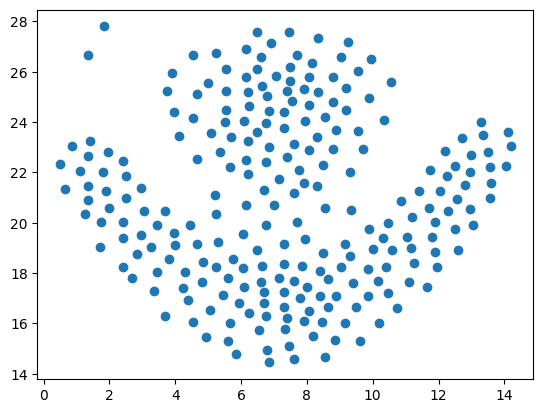

In [50]:
plt.scatter(flame.iloc[:,0], flame.iloc[:,1], label='True Position')

In [51]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(flame)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [52]:
print(kmeans.cluster_centers_)

[[ 5.6302521  23.34831933  1.30252101]
 [ 8.9892562  18.54876033  1.96694215]]


In [53]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


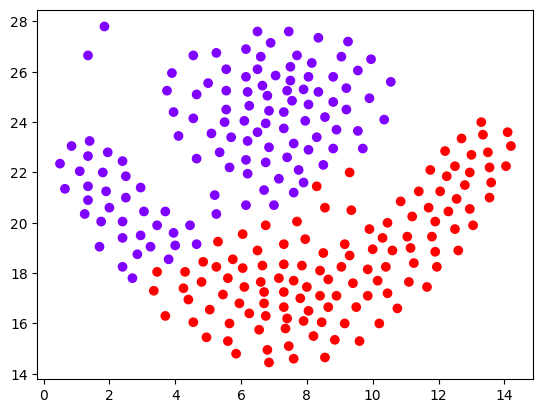

In [54]:
plt.scatter(flame.iloc[:,0], flame.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

In [55]:
silhouette_score(flame, kmeans.fit_predict(flame))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.38002522477283873

In [56]:
jain = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/jain.txt', sep = '\t')

In [57]:
jain.head()

x1     x2  class
0  0.85  17.45      2
1  0.75  15.60      2
2  3.30  15.45      2
3  5.25  14.20      2
4  4.90  15.65      2

In [58]:
plt.scatter(jain.iloc[:,0], jain.iloc[:,1], label='True Position')

In [59]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(jain)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [60]:
print(kmeans.cluster_centers_)

[[31.71540404  8.03737374  1.00505051]
 [15.97542857 16.79457143  1.54857143]]


In [61]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


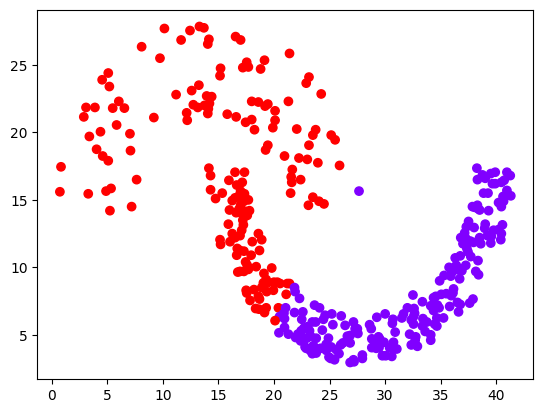

In [62]:
plt.scatter(jain.iloc[:,0], jain.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

In [63]:
silhouette_score(jain, kmeans.fit_predict(jain))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.49498564285279933

In [64]:
pathbased = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/pathbased.txt', sep = '\t')

In [65]:
pathbased.head()

x1    x2  class
0  11.25  5.05      1
1  10.95  4.70      1
2   9.85  5.80      1
3   9.80  5.75      1
4   9.15  6.80      1

In [66]:
plt.scatter(pathbased.iloc[:,0], pathbased.iloc[:,1], label='True Position')

In [67]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(jain)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [68]:
print(kmeans.cluster_centers_)

[[23.43297101  6.72355072  1.04347826]
 [36.77546296 10.48194444  1.        ]
 [14.72322835 19.45314961  1.71653543]]


In [69]:
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


<ipython-input-70-9a2f4577885c>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pathbased.iloc[:,0], pathbased.iloc[:,1], cmap='rainbow')


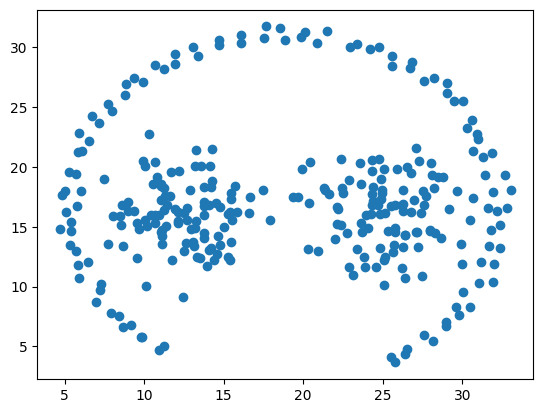

In [70]:
plt.scatter(pathbased.iloc[:,0], pathbased.iloc[:,1], cmap='rainbow')

In [71]:
silhouette_score(pathbased, kmeans.fit_predict(pathbased))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5400868526613694

In [72]:
r15 = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/R15.txt', sep = '\t')

In [73]:
r15.head()

x1      x2  class
0   9.802  10.132      1
1  10.350   9.768      1
2  10.098   9.988      1
3   9.730   9.910      1
4   9.754  10.430      1

In [74]:
plt.scatter(r15.iloc[:,0], r15.iloc[:,1], label='True Position')

In [75]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(r15)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15)

In [76]:
print(kmeans.cluster_centers_)

[[ 9.99775 10.0588   1.     ]
 [ 8.61425  3.7442  14.     ]
 [13.9488  14.94685 10.     ]
 [ 9.468    7.99285  7.     ]
 [ 4.24225 12.8091  12.     ]
 [ 4.22275  7.1201  13.     ]
 [ 8.6298  16.26625 11.     ]
 [14.07115  5.012   15.     ]
 [16.3967   9.9345   9.     ]
 [ 9.6026  11.85475  4.     ]
 [12.06365 10.0344   2.     ]
 [11.2535   8.3996   8.     ]
 [ 8.12415 10.82865  5.     ]
 [11.24455 11.62195  3.     ]
 [ 8.0832   9.0688   6.     ]]


In [77]:
print(kmeans.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11  8  8  8  8  8  8  8  8  8

In [78]:
plt.scatter(r15.iloc[:,0], r15.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

In [79]:
silhouette_score(r15, kmeans.fit_predict(r15))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8023760811123168

In [80]:
spiral = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/spiral.txt', sep = '\t')

In [81]:
spiral.head()

x1    x2  class
0  31.95  7.95      3
1  31.15  7.30      3
2  30.45  6.65      3
3  29.70  6.00      3
4  28.90  5.55      3

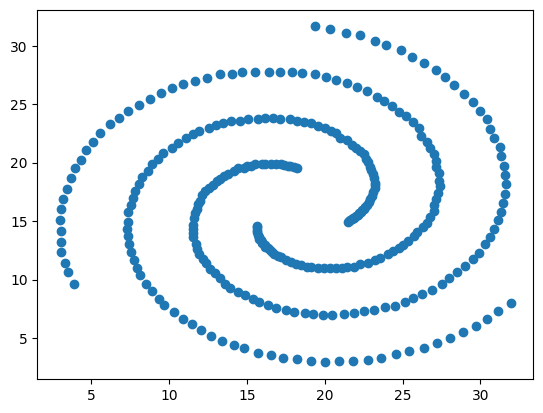

In [82]:
plt.scatter(spiral.iloc[:,0], spiral.iloc[:,1], label='True Position')

In [83]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(spiral)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [84]:
print(kmeans.cluster_centers_)

[[20.7146789   9.48807339  2.03669725]
 [10.274      18.028       2.01      ]
 [23.86456311 21.96650485  2.        ]]


In [85]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]


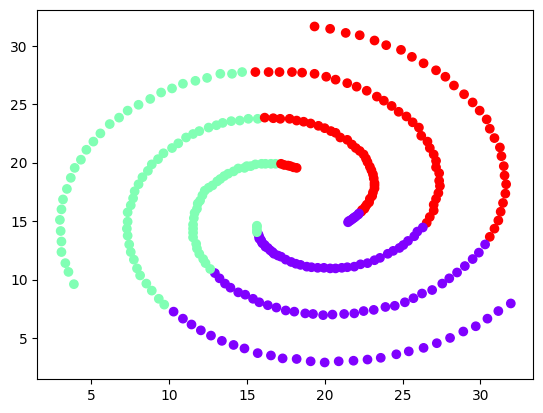

In [86]:
plt.scatter(spiral.iloc[:,0], spiral.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

In [87]:
silhouette_score(spiral, kmeans.fit_predict(spiral))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.356771520779659

In [88]:
s1 = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практика_8_9/!data/s1.txt', sep = '\  ')

<ipython-input-88-43cce91adaf4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  s1 = pd.read_csv('/content/drive/MyDrive/s1.txt', sep = '\  ')


In [89]:
s1.head()

x1      x2
664159 NaN  550946
665845 NaN  557965
597173 NaN  575538
618600 NaN  551446
635690 NaN  608046